In [11]:
import pandas as pd

train1 = pd.read_csv('train-1.csv')
train2 = pd.read_csv('train-2.csv')
train3 = pd.read_csv('train-3.csv')
TRAIN = pd.concat([train1, train2, train3], ignore_index=True)

test1 = pd.read_csv('test-1.csv')
test2 = pd.read_csv('test-2.csv')
test3 = pd.read_csv('test-3.csv')

X_train = TRAIN["Sentence"]
y_train = TRAIN["Label"]
X_train3 = train3["Sentence"]
y_train3 = train3["Label"]
X_test1 = test1["Sentence"]
y_test1 = test1["Label"]
X_test2 = test2["Sentence"]
y_test2 = test2["Label"]
X_test3 = test3["Sentence"]
y_test3 = test3["Label"]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words_cro = [
"a", "ako", "da", "do", "dok", "gdje", "i", "iako", "ili", "iz", "jer",
"kad", "kao", "kroz", "li", "na", "nad", "nakon", "nego", "no", "o", "od",
"opet", "pa", "po", "pod", "preko", "prije", "protiv", "sa", "se", "u", "uz",
"za", "zar", "će", "ćeš", "ćemo", "ćete", "koji", "koja", "koje", "kojem",
"kojeg", "čiji", "čija", "čije", "čim", "čime", "kako", "kada", "tko"
]

vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words_cro, ngram_range=(1, 3))

X_train_vec = vectorizer.fit_transform(TRAIN["Sentence"])
X_train3_vec = vectorizer.transform(X_train3)

X_test1_vec = vectorizer.transform(X_test1)
X_test2_vec = vectorizer.transform(X_test2)
X_test3_vec = vectorizer.transform(X_test3)

1. metoda: LogisticRegression

In [13]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [14]:
from sklearn.linear_model import LogisticRegression
#TRAIN
logreg = LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42)
logreg.fit(X_train_vec, y_train)

y_pred1 = logreg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"LogReg (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = logreg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"LogReg (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = logreg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"LogReg (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
logreg.fit(X_train3_vec, y_train3)

y_pred1 = logreg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"LogReg (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = logreg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"LogReg (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = logreg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"LogReg (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

LogReg (Test-1, TRAIN): Precision=0.617, Recall=0.629, F1=0.620, Accuracy=0.629
LogReg (Test-2, TRAIN): Precision=0.611, Recall=0.632, F1=0.619, Accuracy=0.632
LogReg (Test-3, TRAIN): Precision=0.659, Recall=0.678, F1=0.660, Accuracy=0.678
LogReg (Test-1, Train-3): Precision=0.593, Recall=0.616, F1=0.602, Accuracy=0.616
LogReg (Test-2, Train-3): Precision=0.595, Recall=0.632, F1=0.600, Accuracy=0.632
LogReg (Test-3, Train-3): Precision=0.640, Recall=0.665, F1=0.636, Accuracy=0.665


2. metoda: Multinomial Naive Bayes

In [15]:
from sklearn.naive_bayes import MultinomialNB
#TRAIN
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_vec, y_train)

y_pred1 = mnb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"MNB (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = mnb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"MNB (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = mnb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"MNB (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train3_vec, y_train3)

y_pred1 = mnb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"MNB (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = mnb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"MNB (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = mnb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"MNB (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

MNB (Test-1, TRAIN): Precision=0.606, Recall=0.659, F1=0.618, Accuracy=0.659
MNB (Test-2, TRAIN): Precision=0.637, Recall=0.673, F1=0.621, Accuracy=0.673
MNB (Test-3, TRAIN): Precision=0.676, Recall=0.694, F1=0.646, Accuracy=0.694
MNB (Test-1, Train-3): Precision=0.598, Recall=0.616, F1=0.606, Accuracy=0.616
MNB (Test-2, Train-3): Precision=0.593, Recall=0.626, F1=0.602, Accuracy=0.626
MNB (Test-3, Train-3): Precision=0.654, Recall=0.671, F1=0.640, Accuracy=0.671


Confusion matrix:

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

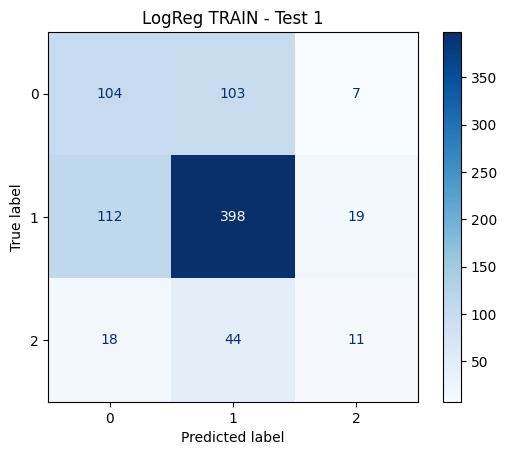

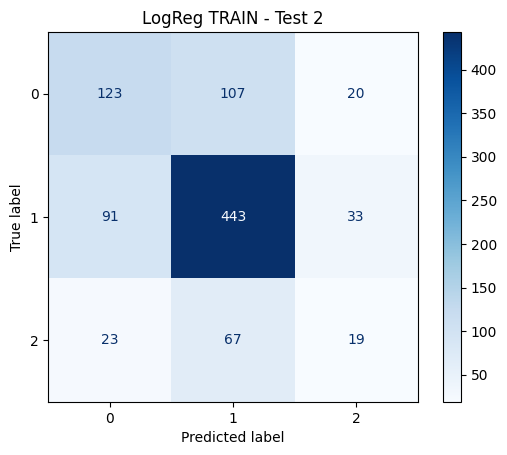

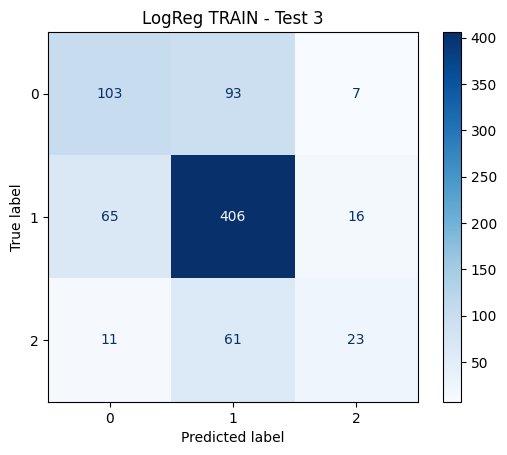

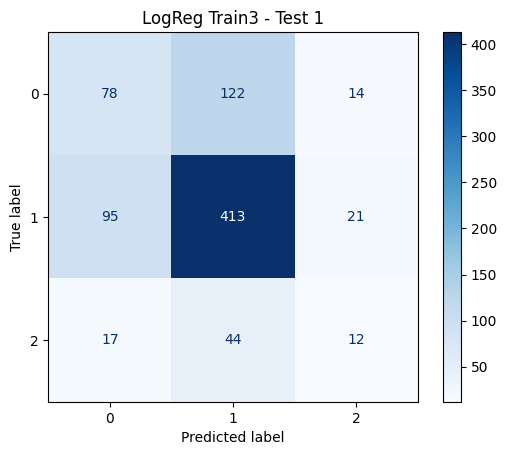

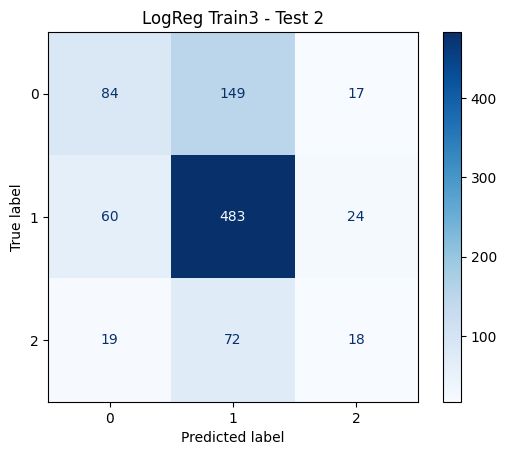

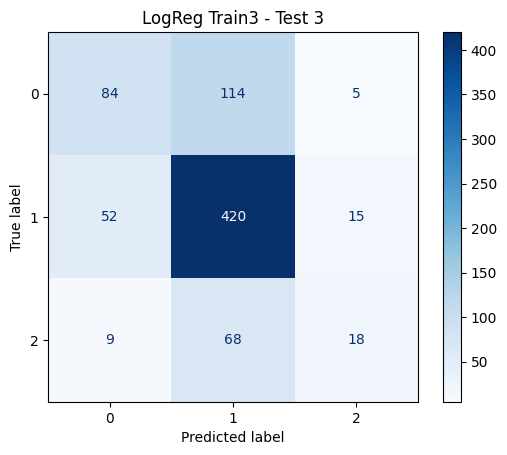

In [17]:
logreg.fit(X_train_vec, y_train)
y_pred1 = logreg.predict(X_test1_vec)
y_pred2 = logreg.predict(X_test2_vec)
y_pred3 = logreg.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1, "LogReg TRAIN - Test 1")
plot_confusion_matrix(y_test2, y_pred2, "LogReg TRAIN - Test 2")
plot_confusion_matrix(y_test3, y_pred3, "LogReg TRAIN - Test 3")

logreg.fit(X_train3_vec, y_train3)
y_pred1 = logreg.predict(X_test1_vec)
y_pred2 = logreg.predict(X_test2_vec)
y_pred3 = logreg.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1, "LogReg Train3 - Test 1")
plot_confusion_matrix(y_test2, y_pred2, "LogReg Train3 - Test 2")
plot_confusion_matrix(y_test3, y_pred3, "LogReg Train3 - Test 3")

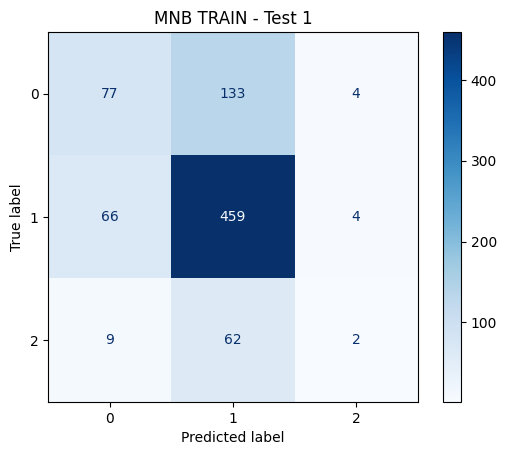

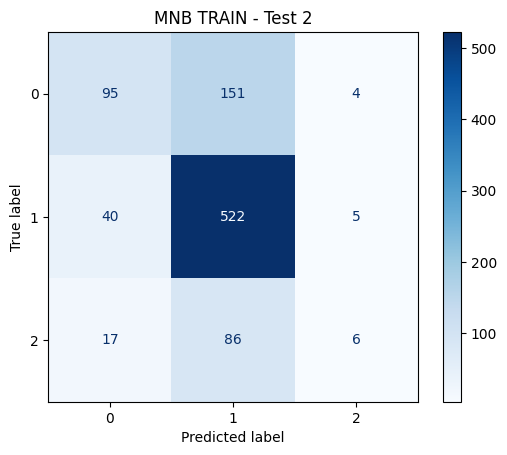

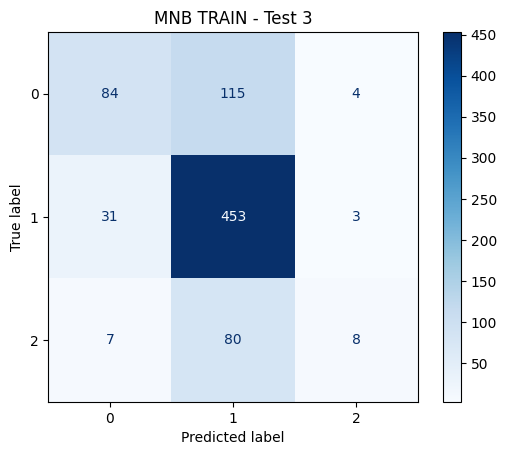

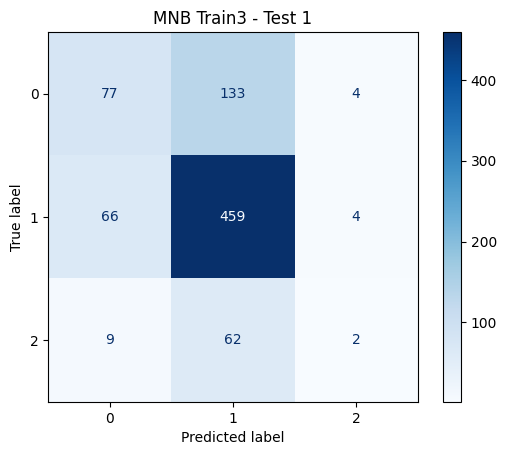

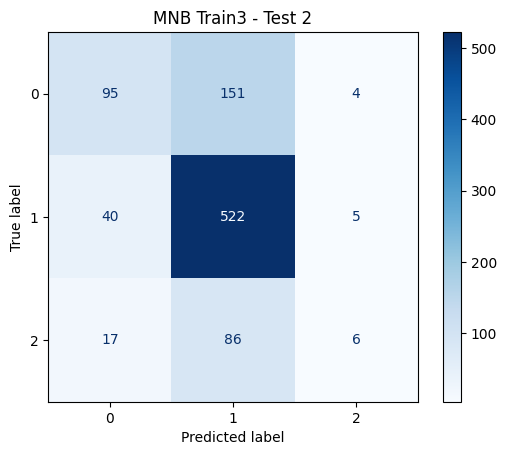

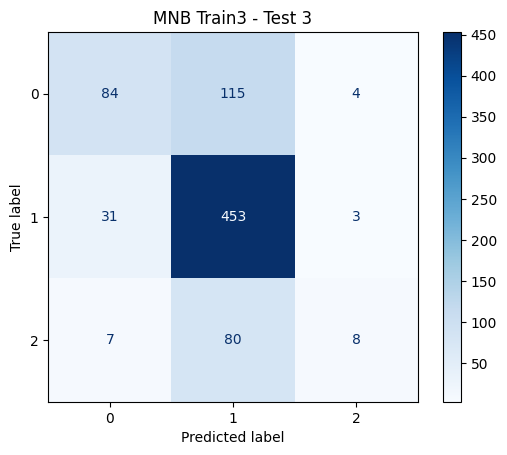

In [18]:
mnb.fit(X_train_vec, y_train)
y_pred1 = mnb.predict(X_test1_vec)
y_pred2 = mnb.predict(X_test2_vec)
y_pred3 = mnb.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1, "MNB TRAIN - Test 1")
plot_confusion_matrix(y_test2, y_pred2, "MNB TRAIN - Test 2")
plot_confusion_matrix(y_test3, y_pred3, "MNB TRAIN - Test 3")

mnb.fit(X_train3_vec, y_train3)
y_pred1_xgb = mnb.predict(X_test1_vec)
y_pred2_ygb = mnb.predict(X_test2_vec)
y_pred3_ygb = mnb.predict(X_test3_vec)
plot_confusion_matrix(y_test1, y_pred1, "MNB Train3 - Test 1")
plot_confusion_matrix(y_test2, y_pred2, "MNB Train3 - Test 2")
plot_confusion_matrix(y_test3, y_pred3, "MNB Train3 - Test 3")

OSTALE METODE:

In [19]:
from sklearn.linear_model import RidgeClassifier
#TRAIN
rdg = RidgeClassifier(alpha=0.8, solver='auto')
rdg.fit(X_train_vec, y_train)

y_pred1 = rdg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Ridge (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = rdg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Ridge (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = rdg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Ridge (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
rdg.fit(X_train3_vec, y_train3)

y_pred1 = rdg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"Ridge (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = rdg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"Ridge (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = rdg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"Ridge (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

Ridge (Test-1, TRAIN): Precision=0.637, Recall=0.657, F1=0.636, Accuracy=0.657
Ridge (Test-2, TRAIN): Precision=0.621, Recall=0.661, F1=0.632, Accuracy=0.661
Ridge (Test-3, TRAIN): Precision=0.679, Recall=0.697, F1=0.660, Accuracy=0.697
Ridge (Test-1, Train-3): Precision=0.587, Recall=0.621, F1=0.599, Accuracy=0.621
Ridge (Test-2, Train-3): Precision=0.600, Recall=0.640, F1=0.599, Accuracy=0.640
Ridge (Test-3, Train-3): Precision=0.654, Recall=0.676, F1=0.640, Accuracy=0.676


In [20]:
from sklearn.linear_model import LinearRegression
#TRAIN
linreg = LogisticRegression()
linreg.fit(X_train_vec, y_train)

y_pred1 = linreg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"LinReg (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = linreg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"LinReg (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = linreg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"LinReg (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
linreg.fit(X_train3_vec, y_train3)

y_pred1 = linreg.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"LinReg (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = linreg.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"LinReg (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = linreg.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"LinReg (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

LinReg (Test-1, TRAIN): Precision=0.642, Recall=0.668, F1=0.626, Accuracy=0.668
LinReg (Test-2, TRAIN): Precision=0.666, Recall=0.681, F1=0.634, Accuracy=0.681
LinReg (Test-3, TRAIN): Precision=0.688, Recall=0.697, F1=0.643, Accuracy=0.697
LinReg (Test-1, Train-3): Precision=0.542, Recall=0.636, F1=0.559, Accuracy=0.636
LinReg (Test-2, Train-3): Precision=0.588, Recall=0.637, F1=0.548, Accuracy=0.637
LinReg (Test-3, Train-3): Precision=0.653, Recall=0.659, F1=0.574, Accuracy=0.659


In [24]:
from sklearn.tree import DecisionTreeClassifier
#TRAIN
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=0.5)
dtc.fit(X_train_vec, y_train)

y_pred1 = dtc.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"DecisionTreeClassifier (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = dtc.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"DecisionTreeClassifier (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = dtc.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"DecisionTreeClassifier (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
dtc.fit(X_train3_vec, y_train3)

y_pred1 = dtc.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"DecisionTreeClassifier (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = dtc.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"DecisionTreeClassifier (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = dtc.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"DecisionTreeClassifier (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

DecisionTreeClassifier (Test-1, TRAIN): Precision=0.601, Recall=0.647, F1=0.596, Accuracy=0.647
DecisionTreeClassifier (Test-2, TRAIN): Precision=0.573, Recall=0.618, F1=0.555, Accuracy=0.618
DecisionTreeClassifier (Test-3, TRAIN): Precision=0.679, Recall=0.661, F1=0.595, Accuracy=0.661
DecisionTreeClassifier (Test-1, Train-3): Precision=0.560, Recall=0.638, F1=0.545, Accuracy=0.638
DecisionTreeClassifier (Test-2, Train-3): Precision=0.539, Recall=0.607, F1=0.512, Accuracy=0.607
DecisionTreeClassifier (Test-3, Train-3): Precision=0.611, Recall=0.638, F1=0.553, Accuracy=0.638


In [25]:
from sklearn.linear_model import SGDClassifier
#TRAIN
sgd = SGDClassifier(alpha=0.0001, loss='hinge', penalty=None)
sgd.fit(X_train_vec, y_train)

y_pred1 = sgd.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SGD (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = sgd.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SGD (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = sgd.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SGD (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train-3
sgd.fit(X_train3_vec, y_train3)

y_pred1 = sgd.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SGD (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = sgd.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SGD (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = sgd.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SGD (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

SGD (Test-1, TRAIN): Precision=0.613, Recall=0.607, F1=0.608, Accuracy=0.607
SGD (Test-2, TRAIN): Precision=0.614, Recall=0.623, F1=0.618, Accuracy=0.623
SGD (Test-3, TRAIN): Precision=0.644, Recall=0.661, F1=0.648, Accuracy=0.661
SGD (Test-1, Train-3): Precision=0.584, Recall=0.561, F1=0.571, Accuracy=0.561
SGD (Test-2, Train-3): Precision=0.593, Recall=0.603, F1=0.596, Accuracy=0.603
SGD (Test-3, Train-3): Precision=0.635, Recall=0.646, F1=0.639, Accuracy=0.646


In [26]:
#TRAIN
from sklearn.svm import SVC
svm = SVC(C=10, gamma='scale', kernel='rbf', random_state=42)
svm.fit(X_train_vec, y_train)

y_pred1 = svm.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SVM (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = svm.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SVM (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = svm.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SVM (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train3
svm.fit(X_train3_vec, y_train3)

y_pred1 = svm.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"SVM (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = svm.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"SVM (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = svm.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"SVM (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

SVM (Test-1, TRAIN): Precision=0.644, Recall=0.670, F1=0.637, Accuracy=0.670
SVM (Test-2, TRAIN): Precision=0.651, Recall=0.683, F1=0.643, Accuracy=0.683
SVM (Test-3, TRAIN): Precision=0.690, Recall=0.697, F1=0.655, Accuracy=0.697
SVM (Test-1, Train-3): Precision=0.565, Recall=0.634, F1=0.574, Accuracy=0.634
SVM (Test-2, Train-3): Precision=0.637, Recall=0.648, F1=0.575, Accuracy=0.648
SVM (Test-3, Train-3): Precision=0.646, Recall=0.657, F1=0.588, Accuracy=0.657


In [27]:
from xgboost import XGBClassifier
#TRAIN
xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=42, gamma=0.1)
xgb.fit(X_train_vec, y_train)

y_pred1 = xgb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"XGB (Test-1, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = xgb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"XGB (Test-2, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = xgb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"XGB (Test-3, TRAIN): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

#Train3
xgb.fit(X_train3_vec, y_train3)

y_pred1 = xgb.predict(X_test1_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test1, y_pred1, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test1, y_pred1)
print(f"XGB (Test-1, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred2 = xgb.predict(X_test2_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_pred2, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test2, y_pred2)
print(f"XGB (Test-2, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

y_pred3 = xgb.predict(X_test3_vec)
precision, recall, f1, _ = precision_recall_fscore_support(y_test3, y_pred3, average="weighted", zero_division=0)
accuracy = accuracy_score(y_test3, y_pred3)
print(f"XGB (Test-3, Train-3): Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Accuracy={accuracy:.3f}")

XGB (Test-1, TRAIN): Precision=0.606, Recall=0.658, F1=0.604, Accuracy=0.658
XGB (Test-2, TRAIN): Precision=0.612, Recall=0.644, F1=0.579, Accuracy=0.644
XGB (Test-3, TRAIN): Precision=0.686, Recall=0.673, F1=0.604, Accuracy=0.673
XGB (Test-1, Train-3): Precision=0.584, Recall=0.641, F1=0.595, Accuracy=0.641
XGB (Test-2, Train-3): Precision=0.597, Recall=0.635, F1=0.578, Accuracy=0.635
XGB (Test-3, Train-3): Precision=0.651, Recall=0.668, F1=0.610, Accuracy=0.668
